In [12]:
import skimage
import skimage.io
import skimage.transform
import os
import numpy as np
import utils
import matplotlib.pyplot as plt

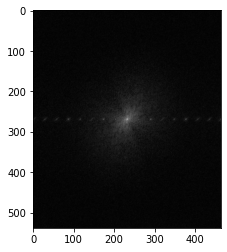

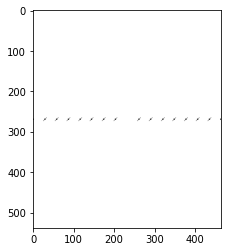

Saving image to: image_processed/moon_kernel.png


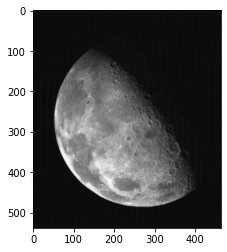

Saving image to: image_processed/moon_filtered.png


In [14]:
if __name__ == "__main__":
    # DO NOT CHANGE
    impath = os.path.join("images", "noisy_moon.png")
    im = utils.read_im(impath)

    ### START YOUR CODE HERE ### (You can change anything inside this block)
    ##Complex image visualization function
    def complex_imshow(fft_im):
        fft_abs = np.abs(fft_im)
        f = np.log(1+fft_abs)
        plt.imshow(f, cmap="gray")
        plt.show()
        return f
    ##############################################STARTED CREATING FILTER################################################################
    def create_filter(fft_im):
        fft_im_shift = fft_im
        #Initial image fft visualization
        complex_imshow(fft_im_shift)
        plt.imsave("./image_processed/moon_fft.png", np.log(1+np.abs(fft_im_shift)))

        #Geting H and W for the image in freq domain
        H, W = fft_im.shape
        #Empty array to store max value for each stride
        z = []
        #Empty array to store index of that Max value
        idx = []
        #Looping over image from its middle position towards horizontal direction with box size 28 in length and 1 in height
        #To find max value and index for that box,NB the box and its next box does not overlap and does not have any distance in between
        for w in range(0,464,28):
            if w<430:
                z.append(np.max(np.abs(fft_im_shift[269,w:w+28])))
                idx.append(w+np.argmax(np.abs(fft_im_shift[269,w:w+28])))
            else:
                z.append(np.max(np.abs(fft_im_shift[269,w:])))
                idx.append(w+np.argmax(np.abs(fft_im_shift[269,w:])))
        #We dnt want to change the center bright spot of the image so we are substituting it with another position from the list idx
        idx[8:9] = [29]
        #We Will remove diagonal bright spot on each of this idices
        ###DIAGONAL LINE REMOVING
        diag_h = []
        diag_w = []
        for i in range(1,len(idx)-1):
            #Five diagonal from center to each sides
            for x in range(5):
                diag_h.append(269-x)
                diag_w.append(idx[i]+x)
                diag_h.append(269+x)
                diag_w.append(idx[i]-x)
        ##create ones Initializing all pass filter
        fft_filter = np.ones((H,W))
        ##Putting zero on the selected spots from indices
        arr = np.full(17,1)
        ##First Moving one side left to center pixel
        arr1 = idx[1:]-arr[1:]
        ##Moving one side right to center pixel
        arr2 = idx[:-1]+arr[:-1]
        ##Center pixel:  Zero
        fft_filter[268:271,idx]=0
        ##Left from center: zero
        fft_filter[268:271,arr1.astype(int)]=0
        ##Right from center: zero
        fft_filter[268:271,arr2.astype(int)]=0
        ##Diagonal:  Zero
        fft_filter[diag_h,diag_w]=0
        #Filter display
        filter = complex_imshow(fft_filter)
        utils.save_im("moon_kernel.png", utils.normalize(filter))
        return fft_filter
    ##############################################FINISHED CREATING FILTER################################################################
    ##############################################NOW FFT CONV############################################################################
    im_filtered = im
    #SPATIAL TO FREQUENCY DOMAIN (Image)
    fft_im = np.fft.fft2(im)
    #CENTER SHIFT
    fft_im_shift = np.fft.fftshift(fft_im)
    #CREATE FILTER
    fft_filter = create_filter(fft_im_shift)
    #FFT CONV
    fft_im_conv = fft_im_shift * fft_filter
    #FREQUENCY DOMAIN TO SPATIAL DOMAIN(CONV Image)
    im_conv = np.fft.ifft2(fft_im_conv)
    #FFT INVERSE SHIFT
    #im_conv_shift = np.fft.ifftshift(im_conv)
    im_filtered = np.abs(im_conv)
    complex_imshow(im_filtered)
    ### END YOUR CODE HERE ###
    utils.save_im("moon_filtered.png", utils.normalize(im_filtered))